In [1]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

Una compañía automotriz china Geely Auto aspira a ingresar al mercado estadounidense estableciendo su unidad de fabricación allí y produciendo automóviles localmente para dar competencia a sus contrapartes estadounidenses y europeas.

Han contratado a una empresa de consultoría automotriz para comprender los factores de los que depende el precio de los automóviles. Específicamente, quieren comprender los factores que afectan el precio de los automóviles en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. La empresa quiere saber:

Qué variables son significativas para predecir el precio de un automóvil Qué tan bien esas variables describen el precio de un automóvil
Sobre la base de varias encuestas de mercado, la firma consultora ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en todo el mercado estadounidense.

Objetivo de negocio
Estamos obligados a modelar el precio de los coches con las variables independientes disponibles. Será utilizado por la gerencia para comprender cómo varían exactamente los precios con las variables independientes. En consecuencia, pueden manipular el diseño de los automóviles, la estrategia comercial, etc. para cumplir con ciertos niveles de precios. Además, el modelo será una buena manera para que la administración comprenda la dinámica de precios de un nuevo mercado.

Tenga en cuenta : El conjunto de datos proporcionado es para fines de aprendizaje. Por favor, no haga ninguna inferencia con el escenario del mundo real.

car_ID: ID único # para cada coche

Símbolo: Evaluación acturiana del riesgo del automóvil (valores numéricos donde -3 es seguro, +3 es arriesgado)

CarName: Marca y modelo de coche

Tipo de combustible: Tipo de combustible para coche (gasolina o diesel)

Aspiración: Aspiración de coche (estándar o turbo)

Número de puerta: Número de puertas de coche (dos o cuatro)

Carrocería: Tipo de carrocería (convertible, sedán, hatchback, vagón o techo rígido)

Rueda motriz: Rueda motriz (tracción trasera, tracción en las 4 ruedas o tracción delantera)

Ubicación del motor: Ubicación del motor del automóvil (delantero o trasero)

Distancia entre ejes: Distancia entre ejes del coche en pulgadas

Carlength: Longitud del coche en pulgadas

Ancho de coche: Ancho del coche en pulgadas

Carheight: Altura del coche en pulgadas

Peso en vacío: Peso del coche en libras

Tipo de motor: Tipo de motor del automóvil (dohc, dohcv, I, ohc, ohcf, ohcv o rotor)

Número de cilindros: Número de cilindros de automóviles (dos, tres, cuatro, cinco, seis, ocho o doce)

Tamaño del motor: Tamaño del motor (valores numéricos de pulgadas cúbicas)

Sistema de combustible: Tipo de sistema de combustible del automóvil (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi o spfi)

Boreratio: Car Bore-Stroke Ratio es la relación entre las dimensiones del diámetro del cilindro del motor y la longitud de la carrera del pistón.

Trazo: Trazos de coche (valor numérico en trazos)

Relación de compresión: Relación de compresión del automóvil (relación entre el volumen del cilindro con el pistón en la posición inferior, Vbottom (volumen más grande) y en la posición superior, Vtop (volumen más pequeño))

Caballos de fuerza: caballos de fuerza del coche (valores numéricos de caballos de fuerza)

Peakrpm: RPM máximas del coche (rotación por minuto)

Citympg: MPG de la ciudad del automóvil (millas por galón)

Highwaympg: MPG de autopista del automóvil (millas por galón)

Precio: precio total del coche en dólares

In [2]:
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Chequeo de nulos
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
#Tipos
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
lista = df.columns
for i in lista:
    if df[i].dtypes == 'object':
        print(i,df[i].unique())
        



CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

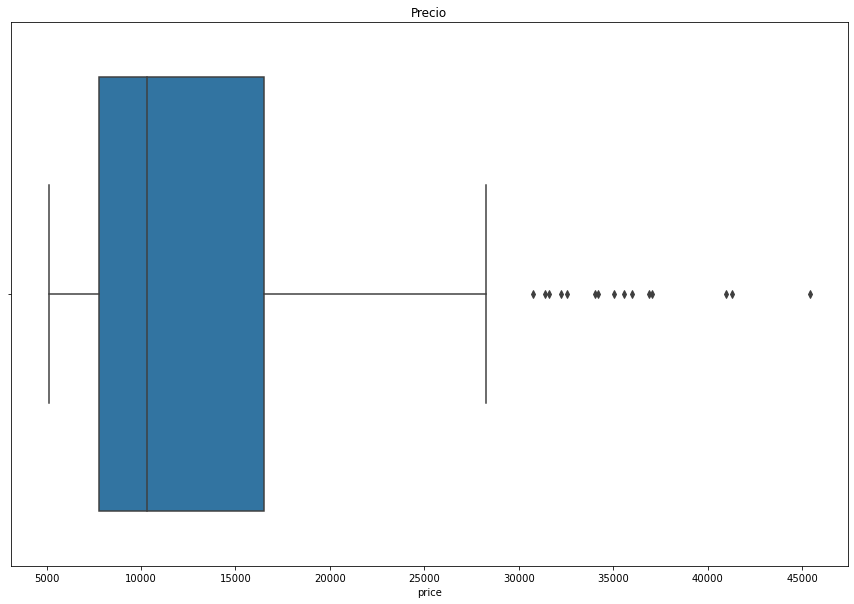

In [8]:
#Análisis de una variable
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(df['price'])
ax.set_title('Precio')
plt.show()

        Se puede apreciar que los datos están sesgados inferiormente, ya que la mediana de los datos tiende hacia la parte inferior de la caja. A su vez, el gráfico pone a prueba outliers en los datos.Sin embargo, no serán eliminados ya que puede existir una inferencia de calidad en el precio.

In [9]:
print(f'El precio promedio de los vehículos está en ',int(df.price.mean()))
print(f'El precio maximo de los vehículos está en ',int(df.price.max()))
print(f'El precio minimo de los vehículos está en ',int(df.price.min()))



El precio promedio de los vehículos está en  13276
El precio maximo de los vehículos está en  45400
El precio minimo de los vehículos está en  5118


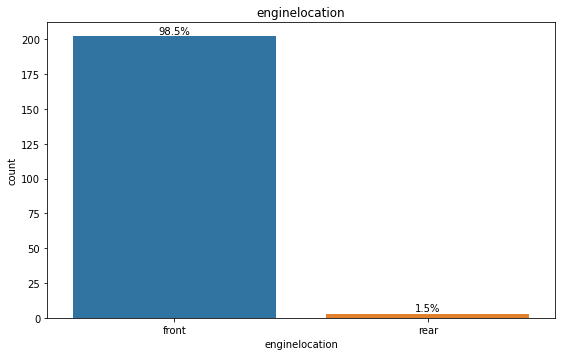

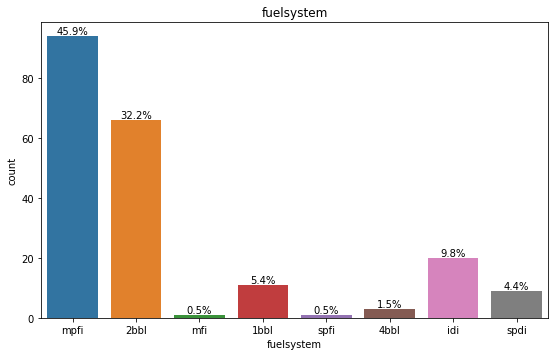

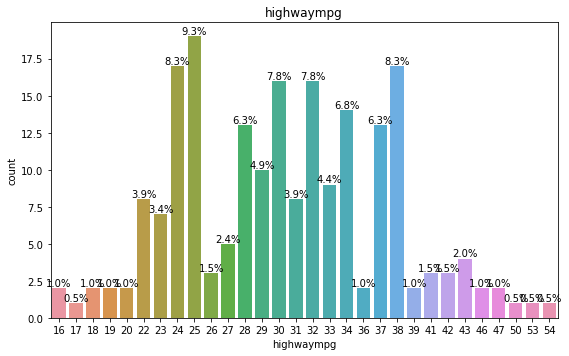

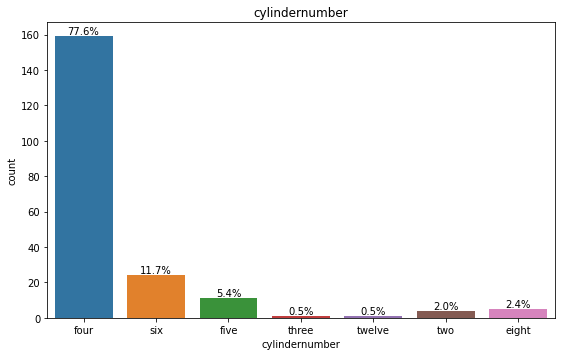

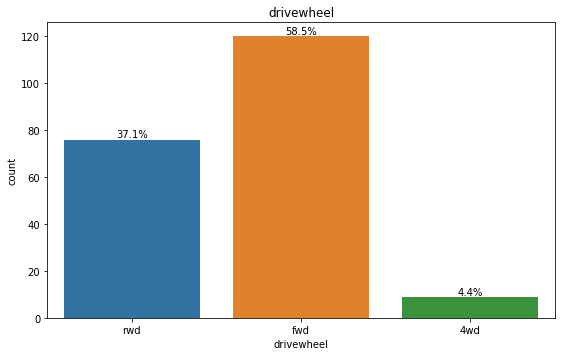

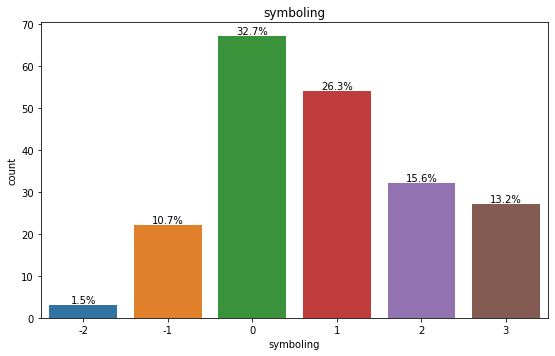

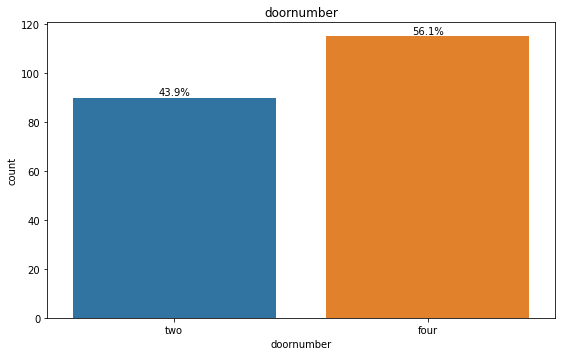

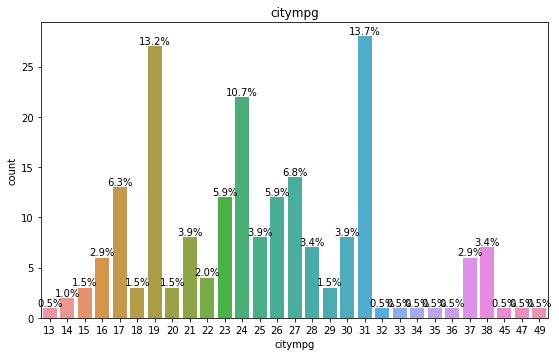

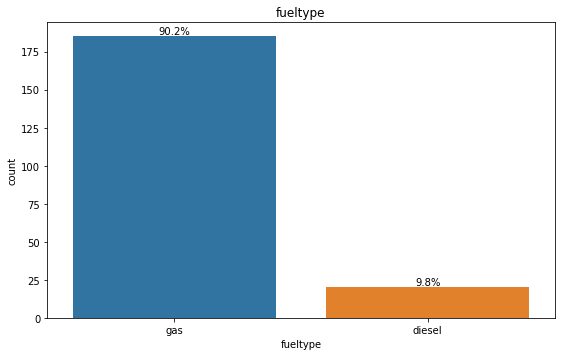

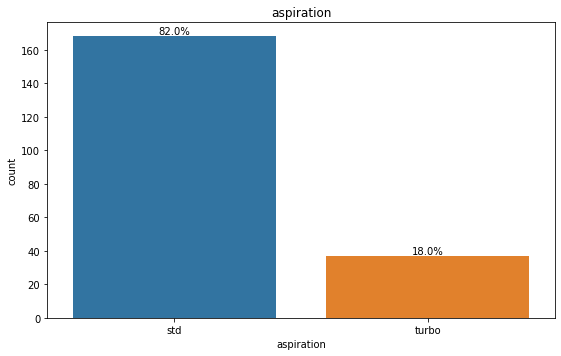

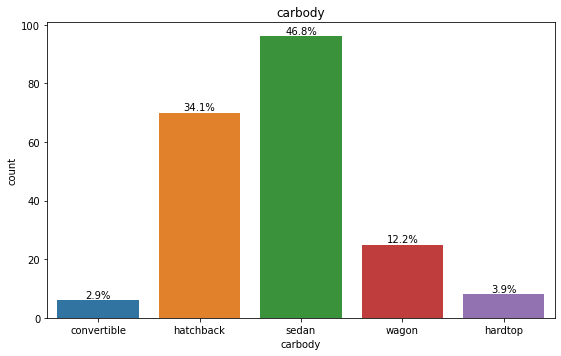

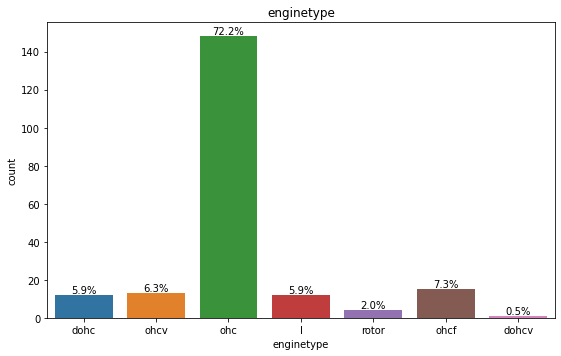

In [10]:
col = {'symboling','fueltype','aspiration','doornumber','carbody','drivewheel',
       'enginelocation','enginetype','cylindernumber','fuelsystem','citympg','highwaympg'}
for i in col:
    plt.figure(figsize = (20,25))
    plt.subplot(4,2,1)
    plt.gca().set_title(i)
    ax = sns.countplot(x = i,data = df)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format((100*y)/205), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [11]:
df.drop(['car_ID'],inplace=True,axis=1)

<Figure size 1440x1800 with 0 Axes>

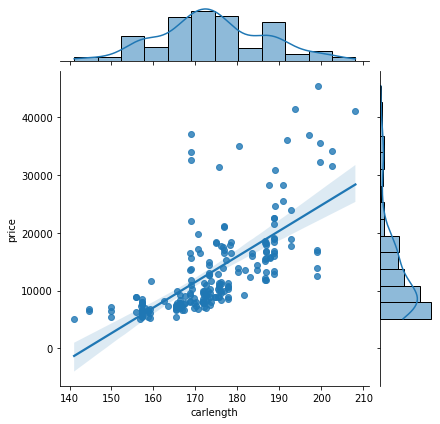

<Figure size 1440x1800 with 0 Axes>

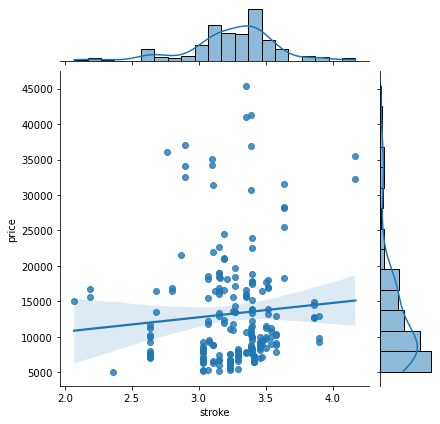

<Figure size 1440x1800 with 0 Axes>

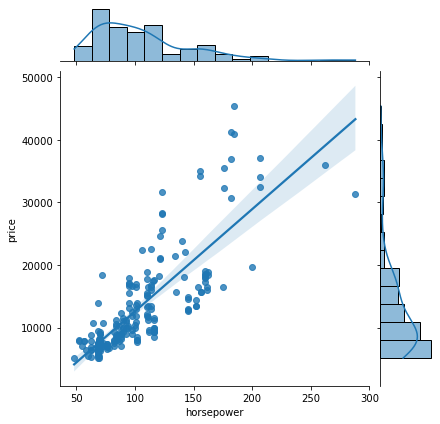

<Figure size 1440x1800 with 0 Axes>

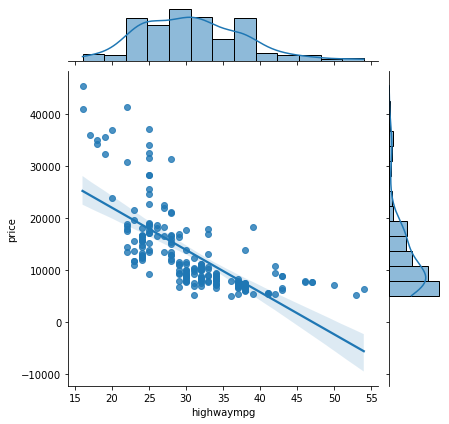

<Figure size 1440x1800 with 0 Axes>

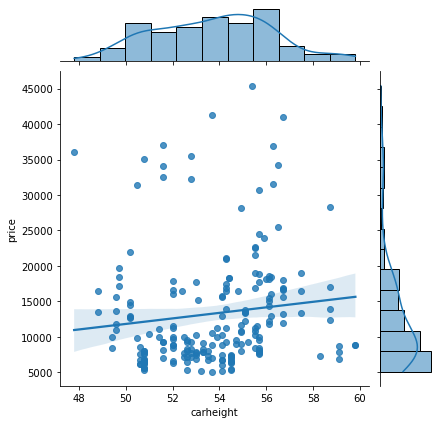

<Figure size 1440x1800 with 0 Axes>

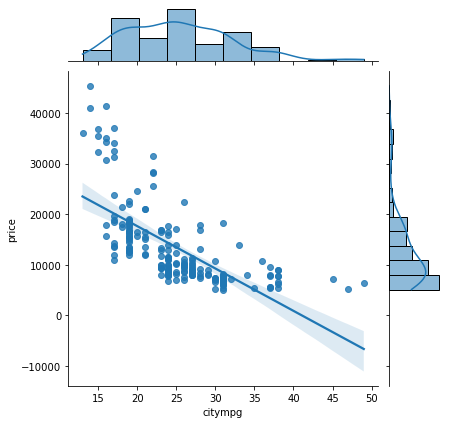

<Figure size 1440x1800 with 0 Axes>

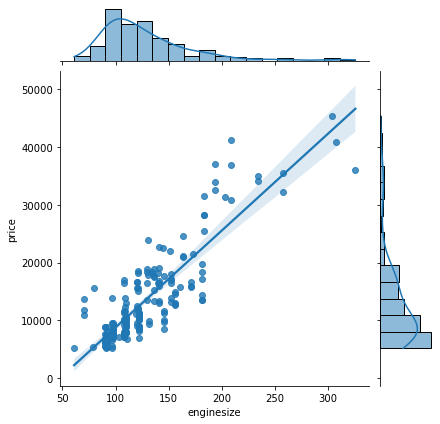

<Figure size 1440x1800 with 0 Axes>

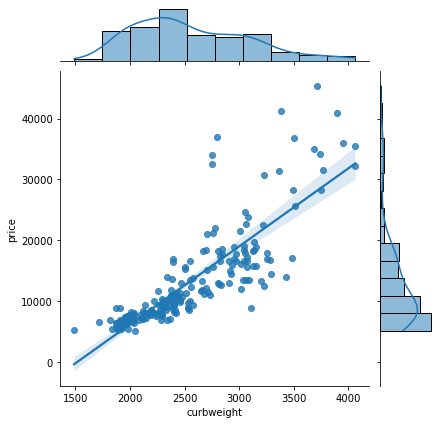

<Figure size 1440x1800 with 0 Axes>

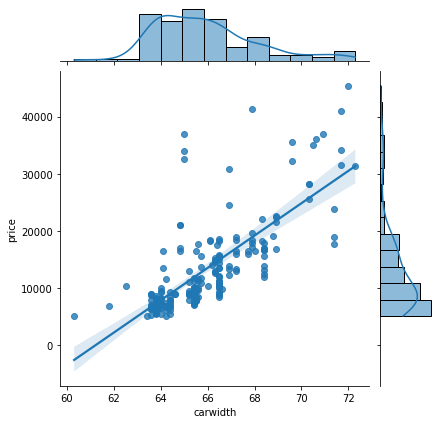

<Figure size 1440x1800 with 0 Axes>

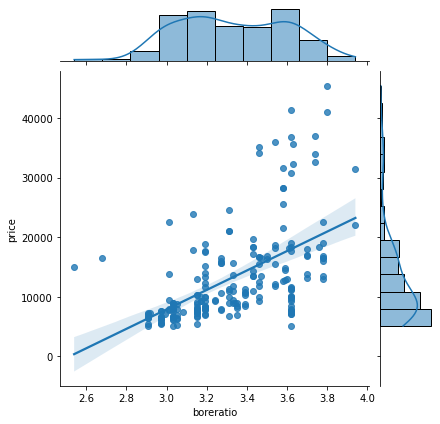

<Figure size 1440x1800 with 0 Axes>

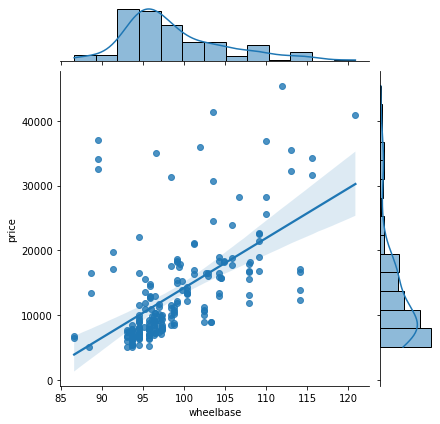

<Figure size 1440x1800 with 0 Axes>

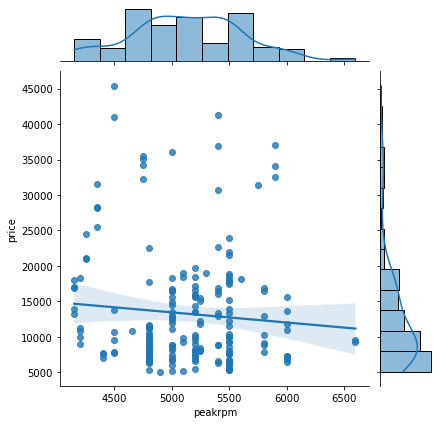

In [12]:
#Se plantea una grafico de dos varaibles con una recta de regresión
col = {'wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','horsepower','peakrpm','citympg','highwaympg'}
for i in col:
    plt.figure(figsize = (20,25))
    sns.jointplot(x = i,y='price' ,data = df,kind='reg')

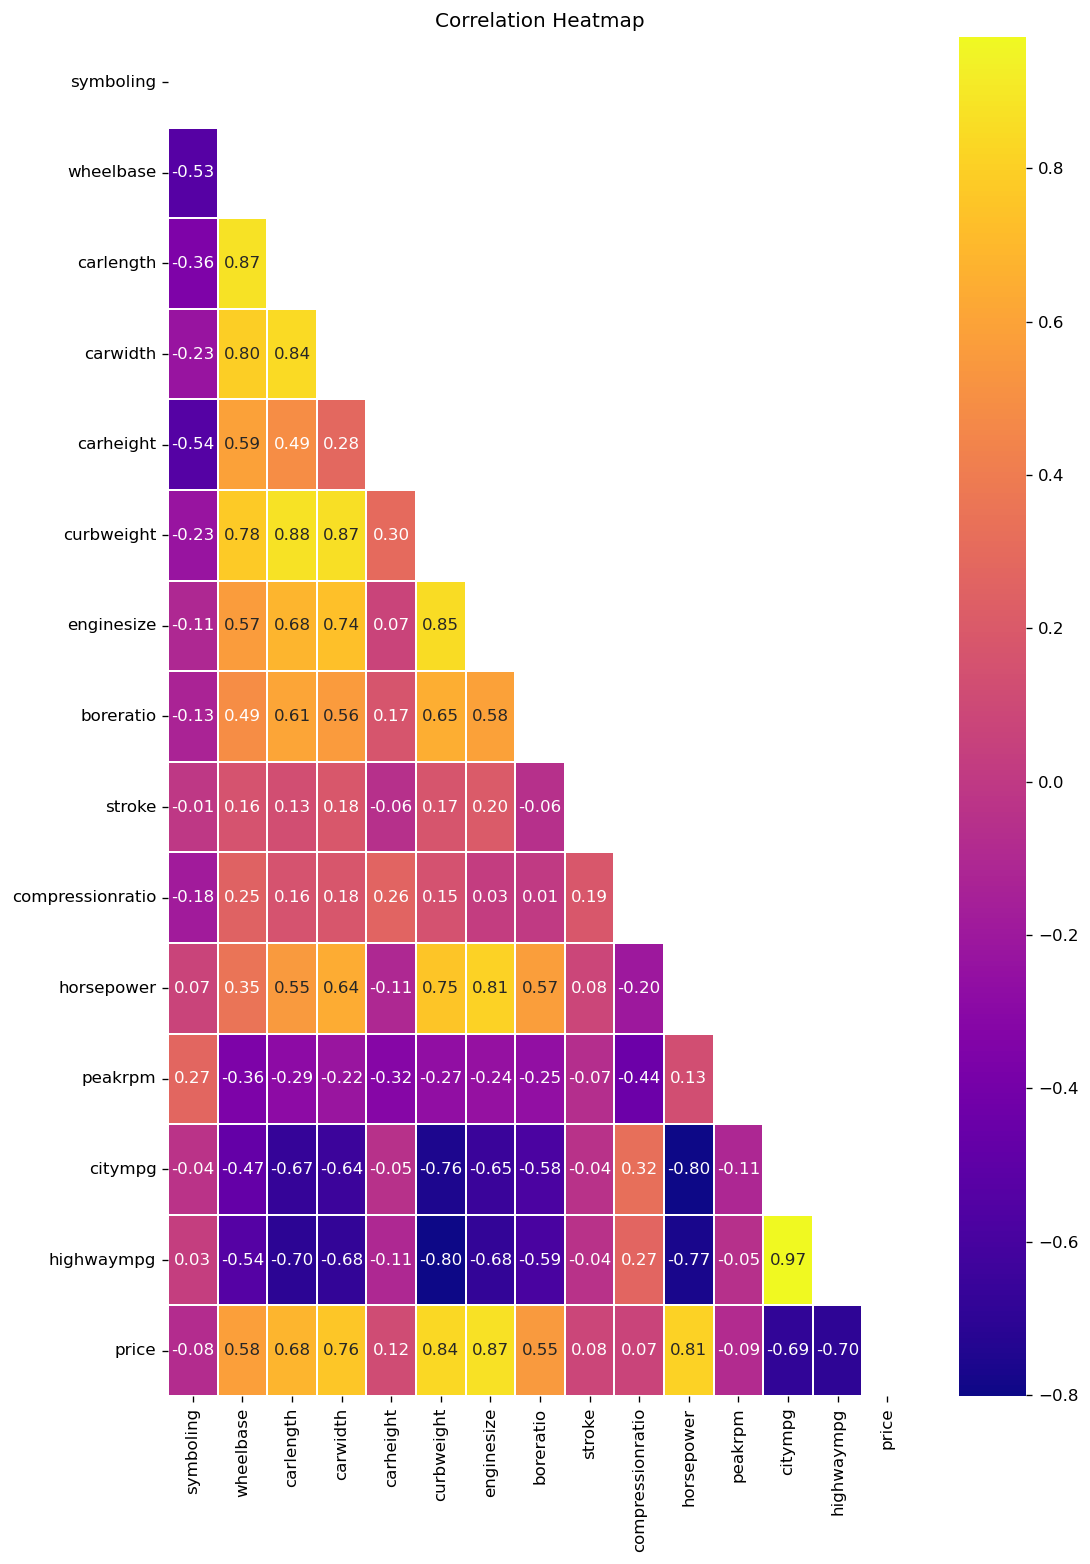

In [13]:
plt.figure(dpi = 120,figsize= (10,15))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask=mask ,fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
len(df.CarName)

205

In [15]:
lista = []
for i in df.CarName:
    marca = i.split()[0]
    lista.append(marca)

In [16]:
len(lista)

205

In [17]:
df['marca'] = lista

In [18]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'marca'],
      dtype='object')

In [19]:
df.marca.nunique()

28

In [20]:
df.marca.replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [21]:
df.marca.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [22]:
df.groupby('marca')['price'].mean().round(0).reset_index(0).sort_values(ascending=True,by='price')

,marca,price
5,chevrolet,6007.0
6,dodge,7875.0
14,plymouth,7963.0
7,honda,8185.0
18,subaru,8541.0
8,isuzu,8916.0
12,mitsubishi,9240.0
16,renault,9595.0
19,toyota,9886.0
20,volkswagen,10078.0


In [23]:
l=df.dtypes
col=df.columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
j=0
for i in l:
    tipo=LabelEncoder()
    df[col[j]]= tipo.fit_transform(df[col[j]])
    j=j+1
df.dtypes

symboling           int64
CarName             int32
fueltype            int32
aspiration          int32
doornumber          int32
carbody             int32
drivewheel          int32
enginelocation      int32
wheelbase           int64
carlength           int64
carwidth            int64
carheight           int64
curbweight          int64
enginetype          int32
cylindernumber      int32
enginesize          int64
fuelsystem          int32
boreratio           int64
stroke              int64
compressionratio    int64
horsepower          int64
peakrpm             int64
citympg             int64
highwaympg          int64
price               int64
marca               int32
dtype: object

In [26]:
X = df.loc[:,df.columns != 'price']
y = df.loc[:,'price']

In [27]:
X.shape, y.shape, df.shape

((205, 25), (205,), (205, 26))

In [28]:
#Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
import xgboost

In [31]:
#Modelo xgboost
xgb = xgboost.XGBRegressor()

In [40]:
parameters = {
    'objective':['reg:squarederror'],
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,200]
}

In [33]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import sklearn

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
grid_cv = RandomizedSearchCV(xgb, parameters, scoring="neg_mean_squared_error", cv=3)
grid_cv.fit(X_train, y_train,
            early_stopping_rounds=10,
            eval_metric = 'logloss',
            eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:-3265.95139
[1]	validation_0-logloss:-3339.71636
[2]	validation_0-logloss:-3393.80062
[3]	validation_0-logloss:-3418.30646
[4]	validation_0-logloss:-3434.63115
[5]	validation_0-logloss:-3449.10537
[6]	validation_0-logloss:-3459.95817
[7]	validation_0-logloss:-3470.08154
[8]	validation_0-logloss:-3477.86132
[9]	validation_0-logloss:-3484.88581
[10]	validation_0-logloss:-3490.94067
[11]	validation_0-logloss:-3496.47814
[12]	validation_0-logloss:-3501.42508
[13]	validation_0-logloss:-3505.75964
[14]	validation_0-logloss:-3509.82603
[15]	validation_0-logloss:-3513.56823
[16]	validation_0-logloss:-3516.95513
[17]	validation_0-logloss:-3520.09771
[18]	validation_0-logloss:-3522.95244
[19]	validation_0-logloss:-3525.54013
[20]	validation_0-logloss:-3527.94862
[21]	validation_0-logloss:-3530.40886
[22]	validation_0-logloss:-3532.67480
[23]	validation_0-logloss:-3534.76609
[24]	validation_0-logloss:-3536.41615
[25]	validation_0-logloss:-3538.21983
[26]	validation_0-logl

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'n_estimators': [100, 200],
                                        'objective': ['reg:squarederror']},
                   scoring='neg_mean_squared_error')

In [45]:
xgb_best=grid_cv.best_estimator_

In [46]:
#Realizando las predicciones
y_test_pred=xgb_best.predict(X_test)

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
15,174,174.393646
9,151,156.233948
100,78,67.812096
132,105,113.549942
68,173,167.833801
...,...,...
56,104,117.281136
128,185,175.982437
76,4,5.477027
144,71,64.196442


In [53]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error: 12.56273098914854
Mean Squared Error: 263.87392071479985
Root Mean Squared Error: 16.244196524137468


In [54]:

from sklearn.metrics import r2_score
print('Puntaje Testing: ', r2_score(y_test, y_test_pred))

Puntaje Testing:  0.9084059441533102
